# Time Series

What is Time Series?

Time Series is sequence of data recorder over time. Most of the time the independent variable is only time. The time interval can be of yearly (ex: annual budget), quarterly (ex: expenses), monthly (ex: air traffic), weekly (ex: sales qty), daily (ex: weather), hourly (ex: stocks price), minutes (ex: inbound calls in a call canter) and even seconds wise (ex: web traffic). We use time series analysis for forecasting purpose as it has tremendous market value, for instance predicting the sales for next five years. 

## ARIMA

### Stationarity (d)

 A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. you simply predict that its statistical properties will be the same in the future as they have been in the past!  Stationarizing a time series through differencing (where needed) is an important part of the process of fitting an ARIMA model.Another reason for trying to stationarize a time series is to be able to obtain meaningful sample statistics such as means, variances, and correlations with other variables. Such statistics are useful as descriptors of future behavior only if the series is stationary. For example, if the series is consistently increasing over time, the sample mean and variance will grow with the size of the sample, and they will always underestimate the mean and variance in future periods. And if the mean and variance of a series are not well-defined, then neither are its correlations with other variables. For this reason you should be cautious about trying to extrapolate regression models fitted to nonstationary data.   
 
Most business and economic time series are far from stationary when expressed in their original units of measurement, and even after deflation or seasonal adjustment they will typically still exhibit trends, cycles, random-walking, and other non-stationary behavior. 

If the series has a stable long-run trend and tends to revert to the trend line following a disturbance, it may be possible to stationarize it by de-trending (e.g., by fitting a trend line and subtracting it out prior to fitting a model, or else by including the time index as an independent variable in a regression or ARIMA model), perhaps in conjunction with logging or deflating.   Such a series is said to be **trend-stationary**.

However, sometimes even de-trending is not sufficient to make the series stationary, in which case it may be necessary to transform it into a series of period-to-period and/or season-to-season differences.  If the mean, variance, and autocorrelations of the original series are not constant in time, even after detrending, perhaps the statistics of the changes in the series between periods or between seasons will be constant.   Such a series is said to be **difference-stationary**.

The first difference of a time series is the series of changes from one period to the next. If Yt denotes the value of the time series Y at period t, then the first difference of Y at period t is equal to Yt-Yt-1. In Statgraphics, the first difference of Y is expressed as DIFF(Y), and in RegressIt it is Y_DIFF1. If the first difference of Y is stationary and also completely random (not autocorrelated), then Y is described by a random walk model: each value is a random step away from the previous value.


### ACF Plot

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. the ACF plot is also useful for identifying non-stationary time series. For a stationary time series, the ACF will drop to zero relatively quickly, while the ACF of non-stationary data decreases slowly.
it describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’.
PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. So if there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next lag as a feature while modeling. Remember while modeling we don’t want to keep too many features which are correlated as that can create multicollinearity issues. Hence we need to retain only the relevant features.

### PCAF

PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. So if there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next lag as a feature while modeling. Remember while modeling we don’t want to keep too many features which are correlated as that can create multicollinearity issues. Hence we need to retain only the relevant features.

### AutoRegressive (p)

Auto Regressive: Auto Regressive is nothing but a linear regression that uses the immediate previous values(lags) as predictors.

Y(t) = a + b1Y(t-1) + b2Y(t-2) + ... + bp Y(t-p) + e1

If the value of p =2, then 

Y(t) = a + b1Y(t-1) + b2Y(t-2) + e1

if p =3
Y(t) = a + b1Y(t-1) + b2Y(t-2) + b3Y(t-3)+ e1




### Moving Average (q)

Next is Moving Average:

Moving Average Model is nothing where the dependent variable is depends on the lagged forecast errors. 

Y(t) = m + l1Y(t-1) + l2Y(t-2) + ... + lp Y(t-q) + e2

If the value of q =2, then 

Y(t) = m + l1Y(t-1) + l2Y(t-2) + e2

if p =3
Y(t) = m + l1Y(t-1) + l2Y(t-2) + l3Y(t-3)+ e2


Now lets discuss about *d*. we have to make the data as stationary. One of the approach is that substract the orevious value from the current value. If you are making stationary by appying the prevous step once, then we write d =1, but if we need to find out differencing one more time, then d=2. if we the data was already in stationary, then d =0

Predicted Yt =  Constant + Auto Regressive of Y(upto p lags) + Moving Avergae (upto q lags).

So during the time series model, the objective was to find out the value of p, q, and d. 



In [9]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import os
os.chdir('C:/Users/SUNNY/Downloads')

### Read The Data

In [10]:
airpax_data = pd.read_csv("./AirPassengers.csv")
airpax_data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [11]:
#Parse strings to datetime type
airpax_data['Month'] = pd.to_datetime(airpax_data['Month'],infer_datetime_format=True) #convert from string to datetime
airpax_data = airpax_data.set_index(['Month'])

In [12]:
airpax_data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


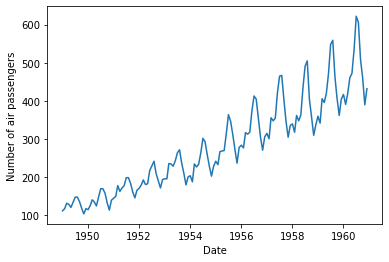

In [13]:
## plot graph
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(airpax_data)
plt.show()

### Rolling Statistics

In [15]:
#Determing rolling statistics
rolmean = airpax_data.rolling(window=12).mean()
rolstd = airpax_data.rolling(window=12).std()

In [16]:
rolmean[0:15]

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [17]:
rolstd[0:15]

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


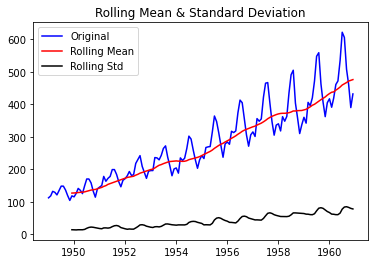

In [136]:
#Plot rolling statistics:
orig = plt.plot(airpax_data, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

### ADF test (Augmented Dickey–Fuller test)

To identify the nature of data, we will be using the null hypothesis.

H0: The null hypothesis: It is a statement about the population that either is believed to be true or is used to put forth an argument unless it can be shown to be incorrect beyond a reasonable doubt.

H1: The alternative hypothesis: It is a claim about the population that is contradictory to H0 and what we conclude when we reject H0.

#Ho: It is non-stationary
#H1: It is stationary
We will be considering the null hypothesis that data is not stationary and the alternate hypothesis that data is stationary.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than or near the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

In [137]:
#Akaike information criterion(AIC) 
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(airpax_data['Passengers'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


#### Graph interpretation

From the above graph, we see that rolling mean has a trend component and rolling standard deviation is fairly constant with time. 
Critical values are no where close to the Test Statistics. Hence, we can say that our Time Series at the moment is not stationary

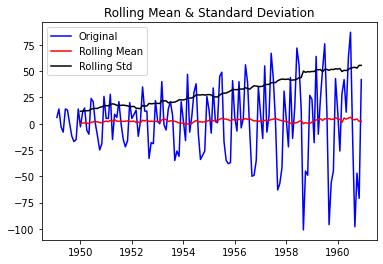

In [138]:
airpax_df1 = airpax_data.diff(periods=1)
airpax_df1.dropna(inplace=True)
#Determing rolling statistics

rolmean = airpax_df1.rolling(window=12).mean()
rolstd = airpax_df1.rolling(window=12).std()
orig = plt.plot(airpax_df1, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()


In [139]:
#Perform Dickey-Fuller test:
dftest = adfuller(airpax_df1['Passengers'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


The rolling values appear to be varying slightly but there is no specific trend.
The test statistic is smaller than the 10% critical values so we can say with 95% confidence that this is a stationary series.

### Time Series Decomposition

<ipython-input-140-660aeb03cf80>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  airpax_decompose = sm.tsa.seasonal_decompose(airpax_data['Passengers'], model="multiplicative", freq=12)


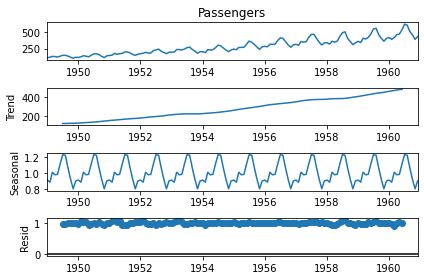

In [140]:
import statsmodels.api as sm
airpax_decompose = sm.tsa.seasonal_decompose(airpax_data['Passengers'], model="multiplicative", freq=12)
airpax_decompose.plot()
plt.show()

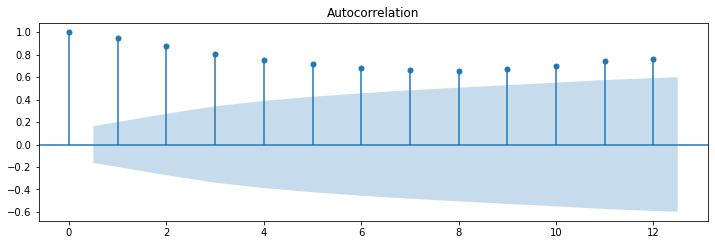

In [141]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(airpax_data['Passengers'].dropna(),lags=12,ax=ax1)


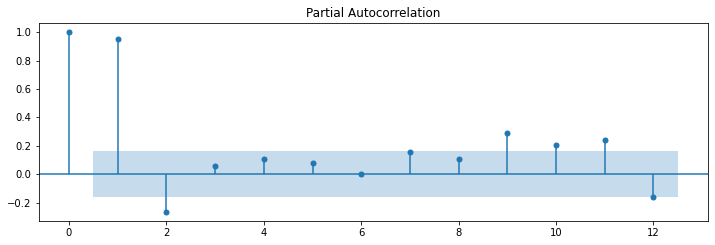

In [142]:
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(airpax_data['Passengers'].dropna(),lags=12,ax=ax2)

## Time Series Model

C:\Users\USer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\USer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

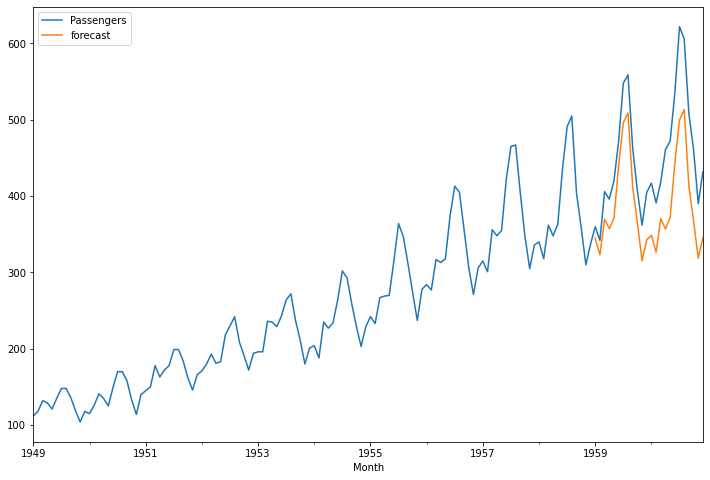

In [143]:
model=sm.tsa.statespace.SARIMAX(airpax_data['Passengers'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
airpax_data['forecast']=results.predict(start=120,end=180,dynamic=True)
airpax_data[['Passengers','forecast']].plot(figsize=(12,8))

### Forecasting

In [144]:
from pandas.tseries.offsets import DateOffset
future_dates=[airpax_data.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=airpax_data.columns)
future_datest_df.tail()
future_df=pd.concat([airpax_data,future_datest_df])
future_df

,Passengers,forecast
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
...,...,...
1962-07-01,NaN,NaN
1962-08-01,NaN,NaN
1962-09-01,NaN,NaN
1962-10-01,NaN,NaN


In [145]:
future_df['forecast'] = results.predict(start = 130, end = 180, dynamic= True)
future_df

,Passengers,forecast
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
...,...,...
1962-07-01,NaN,684.408571
1962-08-01,NaN,696.544299
1962-09-01,NaN,597.180793
1962-10-01,NaN,543.172871


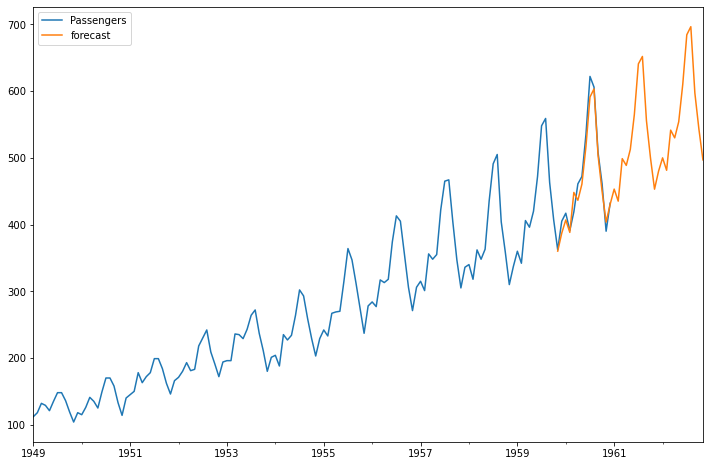

In [146]:
future_df[['Passengers', 'forecast']].plot(figsize=(12, 8))
plt.show()